In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(context="paper", style="darkgrid", palette="deep", color_codes=True, font="serif")

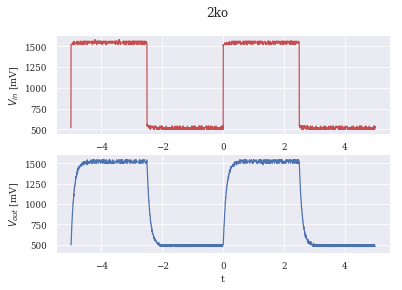

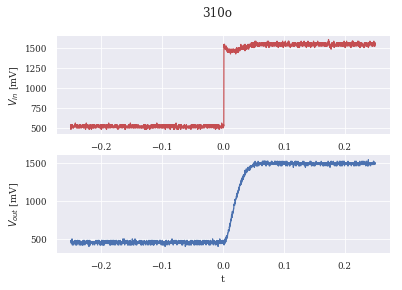

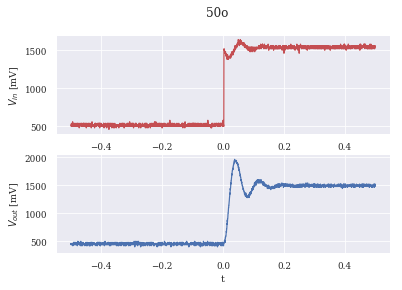

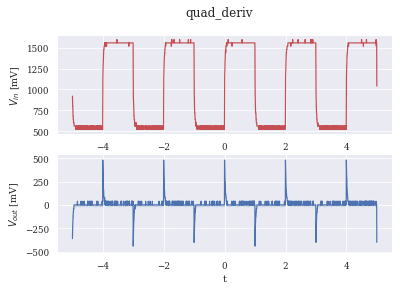

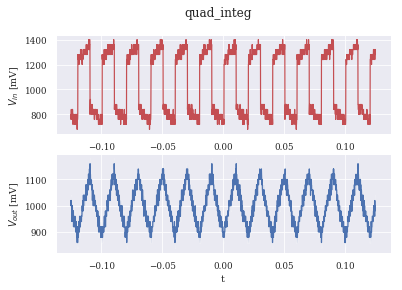

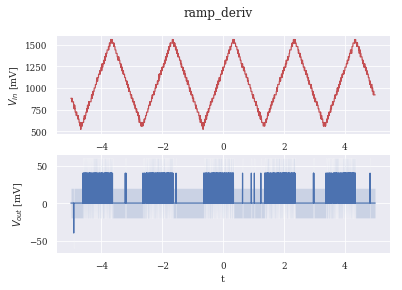

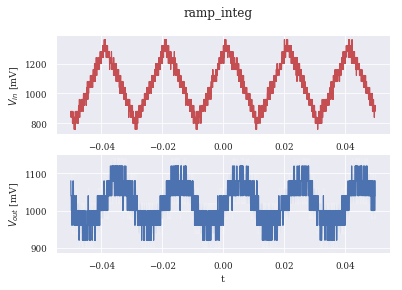

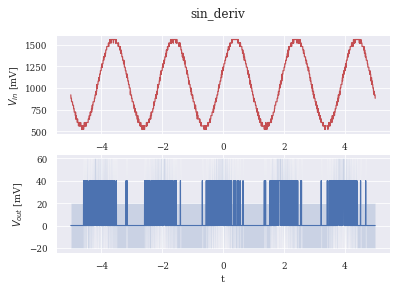

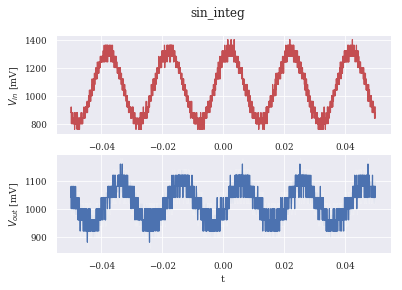

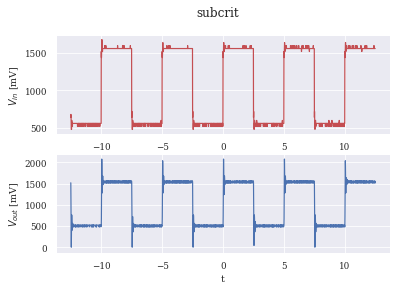

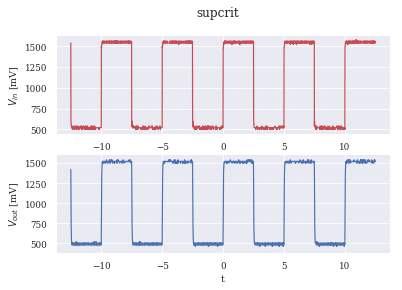

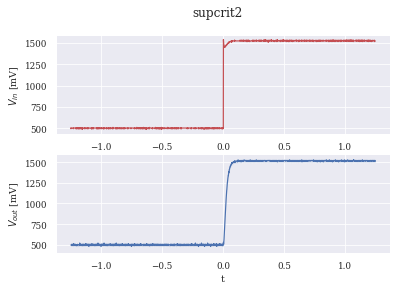

In [3]:
path = "dados/"
csv_list = [file for file in os.listdir(path) if file.endswith(".csv")]
csv_list.sort()

for file in csv_list:
    if not file.endswith(".csv"):
        continue

    dat = pd.read_csv(path + file, dtype=np.longdouble, float_precision="high")
    
    fig, (vin, vout) = plt.subplots(2, 1)
    fig.suptitle(file.replace(".csv", ""))

    sns.lineplot("t", "V1", data=dat, ax=vin, color='r')
    sns.lineplot("t", "V2", data=dat, ax=vout, color='b')
    plt.fill_between(dat["t"], dat["V2"] - dat["V2err"], dat["V2"] + dat["V2err"], alpha=.2)
    
    vin.set_ylabel("$V_{in}$ [mV]")
    vout.set_ylabel("$V_{out}$ [mV]")
    vin.set_xlabel("$t$ [ms]")

    plt.savefig("figuras/" + file.replace(".csv", ".png"), dpi=196)
#     plt.show()